In [1]:
# Import relevant packages.
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Load withdraw and deposit data.
withdraw_transactions_df = pd.read_csv("../data/lighter_complete_withdraw_txs.csv")
deposit_transactions_df = pd.read_csv("../data/lighter_complete_deposit_txs.csv")

In [3]:
# We will call a deposit_address to every address that has deposited in Tcash
deposit_addresses = deposit_transactions_df.from_address.unique()
#pd.DataFrame(deposit_addresses).to_csv("../data/deposit_addresses.csv")

# We will call a withdraw_address to every address that has withdrawal from Tcash
withdraw_addresses = withdraw_transactions_df.recipient_address.unique()
#pd.DataFrame(withdraw_addresses).to_csv("../data/withdraw_addresses.csv")


In [4]:
# Lets load the transactions_of_deposit_addresses, a dataframe that contains 
# all the transactions between a deposit address and a linked address
transactions_of_deposit_addresses =  pd.read_csv("../data/transactions_between_deposit_and_withdraw_addresses.csv")

### function linked_transactions_heuristic
The input DataFrame `transactions_of_deposit_addresses` contain transactions that involve deposit_addresees.
We want to link the input `withdraw_transaction` with a transaction inside the `transactions_of_deposit_addresses`. So, the  `linked_transactions_heuristic` function retuns all the transactions inside the `transactions_of_deposit_addresses` that involve the `withdraw_transaction.recipient_address` and where made before `withdraw_transaction.block_timestamp` 

Important: The input `transactions_of_deposit_addresses` must be sorted  by the column `block_timestamp` for the function to work.

In [5]:
def linked_transactions_heuristic(transactions_of_deposit_addresses, withdraw_transaction):
    
    linked_transactions = pd.DataFrame(columns =  ["withdraw_address", "deposit_address", "transaction_hash"])
    
    # We will iterate over every transaction between a deposit address and a withdraw address.
    # And get the ones between the withdraw_transaction.recipient_address and a deposit address
    for transaction in transactions_of_deposit_addresses.itertuples(index = False):
        # Since the transactions_of_deposit_addresses must be sorted, when we find a transaction
        # that was done before the withdraw_transaction.block_timestamp we can stop searching 
        if transaction.block_timestamp > withdraw_transaction.block_timestamp:
            break
        elif transaction.from_address == withdraw_transaction.recipient_address:
            linked_transactions.loc[len(linked_transactions)] = [withdraw_transaction.recipient_address, transaction.to_address, transaction.hash]
        elif transaction.to_address == withdraw_transaction.recipient_address:
            linked_transactions.loc[len(linked_transactions)] = [withdraw_transaction.recipient_address, transaction.from_address, transaction.hash]
    return linked_transactions

In [6]:
# Lets test the function
sorted_withdraw_transactions_df= withdraw_transactions_df.sort_values("block_timestamp", ignore_index = True )
sorted_transactions_of_deposit_addresses = transactions_of_deposit_addresses.sort_values("block_timestamp", ignore_index = True)
linked_transactions_heuristic(sorted_transactions_of_deposit_addresses,sorted_withdraw_transactions_df.loc[80700])


,withdraw_address,deposit_address,transaction_hash
0,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x806e3751307df85158db59247bf43ac4a76dd0854d76...
1,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x7a1f9f767d5737e549a404a1af933b12f4a6f048,0x518239c5c71ba0e2b805e6e8ed39849c30fdad90aaec...
2,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x8d46fa21b07ea83b9d3baee77fa11055a1e162d21141...
3,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x3829547cb1cb5154e6753e6832468f74a94adec19bc6...
4,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0x450551e229202bc643b3f45df8721b921869bd43f4b0...
5,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xbccdc6d1572ce74be0c6836460e0a40bbf8ead07031e...
6,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0x0557533e68c813a2bba37ca389233f7618c9327657cc...
7,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x510059633c4958d43dfbc50b3b1a4ce6b9cb871a,0x1743d7077af28de73217ee384aff0532944b47183981...
8,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0x6aa263dd363ba99c433a8a4c9e6bfe8a120662029bf1...
9,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0xef6fded787e78210c2d00bc83fe7c181fdb7b3d74917...


### function apply_linked_transactions_heuristic
Apply the `linked_transactions_heuristic` function to each withdraw of the input `withdraw_transactions_df` DataFrame.
Retuns a DataFrame with the columns: `withdraw_address`, `deposit_address` and `transaction_hash`.
You can read this DataFrame in the following way:
The `withdraw_address` is linked to the  `deposit_address` by the transaction `transaction_hash`

In [7]:
# Auxiliary function
# Add the new linked transactions we found to the linked_transactions DataFrame
def add_linked_transactions(linked_transactions, new_linked_transactions):
    hashes_to_add = set(new_linked_transactions.transaction_hash) - set(linked_transactions.transaction_hash)
    transactions_to_add = new_linked_transactions[new_linked_transactions.transaction_hash.isin(hashes_to_add)]
    
    linked_transactions = pd.concat([linked_transactions, transactions_to_add], ignore_index = True)
     
    return linked_transactions

In [8]:
def apply_linked_transactions_heuristic(transactions_of_deposit_addresses, withdraw_transactions_df):
    sorted_withdraw_transactions_df = withdraw_transactions_df.sort_values("block_timestamp", ignore_index = True)
    sorted_top_to_bottom_withdraw_transactions_df = withdraw_transactions_df.sort_values("block_timestamp", ignore_index = True, ascending = False)
    sorted_transactions_of_deposit_addresses = transactions_of_deposit_addresses.sort_values("block_timestamp", ignore_index = True)
    # To ensure we analizaed every withdraw address just once.
    analyzed_withdraw_addresses = []
    # To store all the linked transactions we found

    linked_transactions = pd.DataFrame(columns =  ["withdraw_address", "deposit_address", "transaction_hash"])
    
    # Iterate over every withdrawal transaction.
    # To optimize this for loop we will use the sorted_top_to_bottom_withdraw_transactions_df
    # So, when we analyzed a withdraw address we ensure that we get the withdraw 
    # with the highest :block_timestamp(see linked_transactions_heuristic function).
    for withdraw_transaction in tqdm(sorted_top_to_bottom_withdraw_transactions_df.itertuples(index = False),total = sorted_withdraw_transactions_df.shape[0], mininterval=30):
        if withdraw_transaction.recipient_address not in analyzed_withdraw_addresses:
    
            # Find all the transactions that the withdraw address has had with any deposit address
            new_linked_transactions = linked_transactions_heuristic(sorted_transactions_of_deposit_addresses, withdraw_transaction)
            
            # Add the new_linked_transactions found to the linked_transactions DataFrame
            linked_transactions = add_linked_transactions(linked_transactions, new_linked_transactions)
            
            # Push the to the withdraw_address to the analyzed_withdraw_addresses vector
            analyzed_withdraw_addresses.append(withdraw_transaction.recipient_address)
            
    return linked_transactions


In [9]:
results = apply_linked_transactions_heuristic(transactions_of_deposit_addresses, withdraw_transactions_df)
results

100%|██████████████████████████████████████████████████████████| 83782/83782 [1:23:44<00:00, 16.67it/s]


,withdraw_address,deposit_address,transaction_hash
0,0x4718ce007293bce1e514887e6f55ea71d9a992d6,0x40630b4fd61523450b3dbc4d9fd672aae0a9c31c,0xa662eb6e416a85098d2bf285142799f306e8e60e2cb5...
1,0x4718ce007293bce1e514887e6f55ea71d9a992d6,0x40630b4fd61523450b3dbc4d9fd672aae0a9c31c,0xd33733271ef17ce5cd9b2c21725d1ada50253792f0b1...
2,0x4718ce007293bce1e514887e6f55ea71d9a992d6,0x40630b4fd61523450b3dbc4d9fd672aae0a9c31c,0xcdebe15b4124ec08d316b51c52f469fcac24eadaa098...
3,0x4718ce007293bce1e514887e6f55ea71d9a992d6,0x40630b4fd61523450b3dbc4d9fd672aae0a9c31c,0x902644f0147e7ba27dacdb103eabf70b18e782d0592d...
4,0x1aaf2f422f39687459031e6b9a788eccab84d214,0x1db3439a222c519ab44bb1144fc28167b4fa6ee6,0xc3df8939f6bfa3284fd5f3236c3e960ebdce348bfd27...
...,...,...,...
36897,0x809a2595fed9d8f6d1df68006a684bafc8621857,0xb032ec905759b464a75ebbd41703cccebae77934,0x57735a979ac218d54933f9bcf852b5f19ad48d86729e...
36898,0x6532607387311ca4de9081e45c86620a9a89dd8a,0x45a6a334ed5910ce1226db0a572c582f55c2f5fd,0xe29e42797d6e4d2ec07e90aa2252b58f8385dc83f371...
36899,0x6532607387311ca4de9081e45c86620a9a89dd8a,0x45a6a334ed5910ce1226db0a572c582f55c2f5fd,0x0a68b4ce0f4cec84ebf02bfcc4ace6c6bbcdb80b0bdb...
36900,0x5ebe5635e03f6f2ef7ff2e3dc433ca5fdef2f9cf,0x7d1675dc635959b26f61e03637599c12c7e84fae,0x14cf6516d028d64bf52227abccbef039f77f757d8fac...


Lets inspect the results


In [10]:
groupby_results = results.groupby(["withdraw_address", "deposit_address"]).size().reset_index(name='counts').sort_values("counts", ascending=False)
groupby_results



,withdraw_address,deposit_address,counts
643,0x1ba3e0f3b3a138c3386d37dc85b2f6a08cc2a42e,0x1ba3e0f3b3a138c3386d37dc85b2f6a08cc2a42e,4136
5137,0xd50db60e738d25ba1d21f444adb3dcdd4bdbb30e,0xd50db60e738d25ba1d21f444adb3dcdd4bdbb30e,1163
5591,0xe5818d70a9b5aed2bfde4e41fbcb07dd80f8fc84,0x9dfac9bbe1119da5dcdd7b095db40920cde878ef,344
2913,0x73b687a6cfe7271a31ac563e8703ae787878613c,0xcf701308663a495637f4131f7d3644372e170e5b,281
6118,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,271
...,...,...,...
3598,0x905defdec5eb4f6cd9d9ec4d4c52fc330ef2026b,0x56425bf49a45511bce45eac536c8abe52f627273,1
3600,0x906b88728860201fd2b16b0d19d3f494e6812cb9,0x1eb39d46c9814c8f16ea657d9dc1029575f4d651,1
1224,0x33a316107f71909b7d638f7dd40713c8bbe2d684,0x394c0cbdf12f687d33f53e898d881b73870bb982,1
3602,0x90c04590363a7eba1c7da472e405e304067e4128,0x1e161a441086d2af0d2002616411a3604b73478c,1


In [11]:
groupby_results.sort_values("counts", ascending = False)

,withdraw_address,deposit_address,counts
643,0x1ba3e0f3b3a138c3386d37dc85b2f6a08cc2a42e,0x1ba3e0f3b3a138c3386d37dc85b2f6a08cc2a42e,4136
5137,0xd50db60e738d25ba1d21f444adb3dcdd4bdbb30e,0xd50db60e738d25ba1d21f444adb3dcdd4bdbb30e,1163
5591,0xe5818d70a9b5aed2bfde4e41fbcb07dd80f8fc84,0x9dfac9bbe1119da5dcdd7b095db40920cde878ef,344
2913,0x73b687a6cfe7271a31ac563e8703ae787878613c,0xcf701308663a495637f4131f7d3644372e170e5b,281
6118,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,271
...,...,...,...
5111,0xd3f1a59920a11dd73902d9e7e67466dd00880b2a,0x3605c22d429ba9e09120278a561489f0dda03a8b,1
447,0x1191b823669c7336a41600f77ae3ffa29fe4ca38,0x32893957fb286766855331b1efec9ad1b250e5b1,1
5114,0xd409cea9dd8db30504168063953ce1fa20748cab,0xa331b918d3364b74e9fafdb105c57b97a5d19edd,1
5115,0xd409cea9dd8db30504168063953ce1fa20748cab,0xd409cea9dd8db30504168063953ce1fa20748cab,1


As we can see some withdraw_address have had transactions with more than one deposit_address and vice versa.
We will define that a withdraw_address and a deposit_address are linked, in the cases where the withdraw_address and the deposit_address have had transactions only between them.

For example:

Transaction 1: `deposit_address_1` -> `withdraw_address_1`

Transaction 2: `withdraw_address_1` -> `deposit_address_1`

Transaction 3: `deposit_address_2` -> `withdraw_address_2`

Transaction 4: `withdraw_address_2` -> `deposit_address_2`

Transaction 5: `withdraw_address_2` -> `deposit_address_3`


`deposit_address_1` and `withdraw_address_1` will be consider  linked.
`deposit_address_2` wont be linked to `deposit_address_2`, since withdraw_address_2 has had a transaction with  `deposit_address_3`


In [12]:
# Auxiliary functions 
# Checks if the given address is unique in the input column
def is_unique(address, column):
    return column.value_counts()[address] == 1

In [13]:
def get_linked_addresses(results):
    groupby_results = results.groupby(["withdraw_address", "deposit_address"]).size().reset_index(name='counts').sort_values("counts")
    withdraw_addresses = groupby_results["withdraw_address"]
    deposit_addresses = groupby_results["deposit_address"]
    linked_addresses = {}
    for row in groupby_results.itertuples(index = False):
        if is_unique(row.withdraw_address, withdraw_addresses) and is_unique(row.deposit_address, deposit_addresses):
            linked_addresses[row.withdraw_address] = row.deposit_address
        
    return linked_addresses




In [14]:
linked_addresses = get_linked_addresses(results)
linked_addresses
# In the Julia notebook this linked_addresses are saved into a CSV

{'0xd0f0b33573950c4fd9fad0fc04b321996f958dd6': '0xd0f0b33573950c4fd9fad0fc04b321996f958dd6',
 '0x64033e52a5341aab163d8f8cf9fb13b67e2ff2b2': '0x6d9234820c41eea0e0d9a394400dde5fffa3face',
 '0xd683b78e988ba4bdb9fa0e2012c4c36b7cc96aad': '0x4dc7d82ecc724974185250e94f642a9d15f956ce',
 '0xb4da5c9f528d57f9ee45f7afc2b593e08a79acb6': '0x2bce5aa990ebd07ae444ac267b55c33c62e2671d',
 '0xb4b2442b02a8d8368c9ea9291daa41aabcf4753c': '0xfcb58b643389368aefbcd821c5a39e56249c34c1',
 '0x64554fce8fd59c620107743d7865ebcb99801a77': '0x6a824c083028d85810a8af2fd79ac2b8a5deb287',
 '0x6455a631d70a669db3ea0c2508d33f4d8ea0b9d3': '0x7c464aaedbfffae8f586f3991682b2e21c250fc3',
 '0x647712cce26ef6aaf05cdaa7d3916b61704689e0': '0x4bdfc44bfb2f5329cd1647002cbb664a43dcf945',
 '0x62bca8a25a6c017318748258375ded5adaab9078': '0x4e1e9ef8da3e4a727beb01b26e0f9204056bd381',
 '0x63052a7398f06a295582cecebb9e71a02dadaf05': '0x1eb43e0dd768b3576849a69ad56ae55160709249',
 '0xe5f9bb4afba582ad492a1b0267077c47fd286b88': '0xe5f9bb4afba582ad492a

### Results visualization

In [15]:
def get_histogram_data(results, withdraw_transactions_df):
    groupby_results = results.groupby(["withdraw_address", "deposit_address"]).size().reset_index(name='counts').sort_values("counts")
    withdraw_addresses = withdraw_transactions_df.recipient_address.unique()
    linked_addresses = {}

    for withdraw_address in withdraw_addresses:
        linked_addresses[withdraw_address] = 0
    
    for row in groupby_results.itertuples(index = False):
        linked_addresses[row.withdraw_address] += 1
    
    return linked_addresses


In [16]:
result_values = get_histogram_data(results, withdraw_transactions_df)

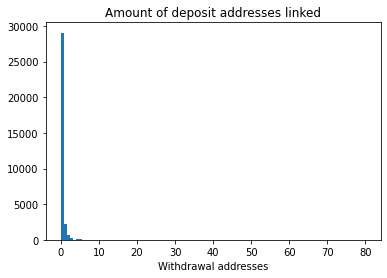

In [22]:
plt.hist(result_values, bins=100)
plt.title("Amount of deposit addresses linked")
plt.xlabel("Withdrawal addresses")
plt.show()